In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import warnings 
warnings.filterwarnings("ignore") #optional
plt.style.use('fivethirtyeight') #optional

## Q1

In [3]:
img = Image.open("fox.jpg")
img = img.convert("RGB")

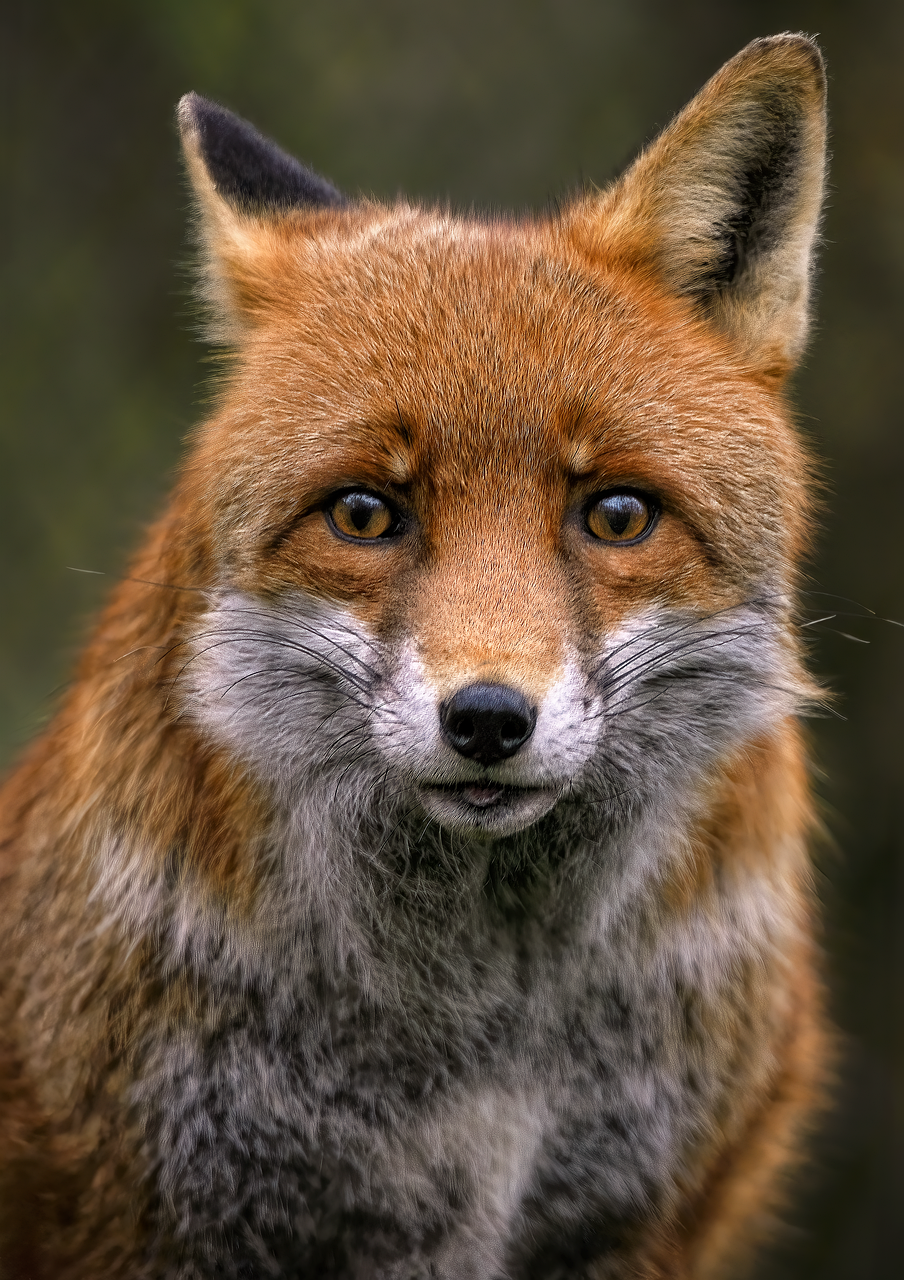

In [4]:
img

In [5]:
from PIL import Image, ImageFilter  

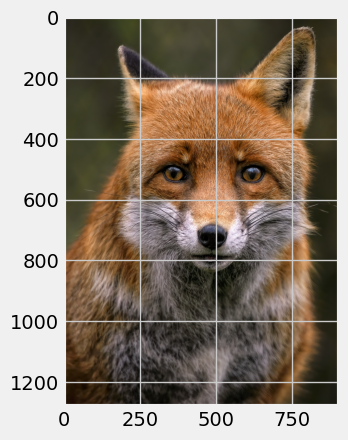

In [6]:
plt.imshow(img)
plt.show()

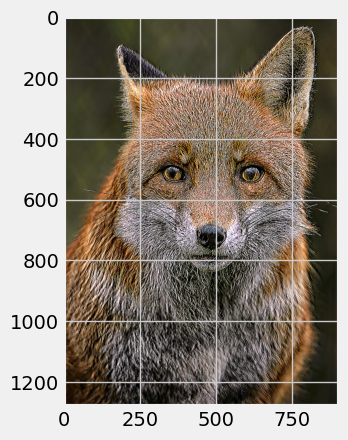

In [7]:
# applying the Kernel filter 
img2 = img.filter(ImageFilter.Kernel((3, 3), 
      (-1, -1, -1, -1, -1, 9, -1, -1, -1), 1, 0))
plt.imshow(img2)
plt.show()

#### This sharpening filter enhances the image by emphasizing differences between each pixel and its surroundings. With a strong positive value (9) at the center and negative values (-1) around it, the kernel highlights edges and finer details. The result is a sharper image with more defined edges and improved contrast, making features like the fox's fur and facial details more prominent.

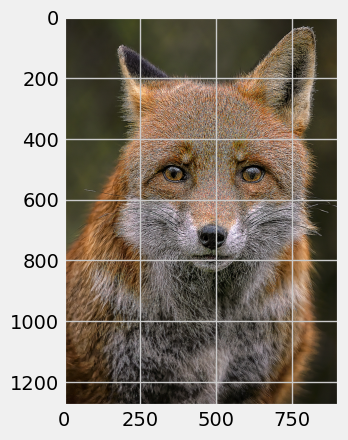

In [9]:
# Apply EDGE_ENHANCE_MORE filter to the image
image_edge_more = img.filter(filter=ImageFilter.EDGE_ENHANCE_MORE)
plt.imshow(image_edge_more)
plt.show()

#### This filter provides a stronger edge enhancement than the standard EDGE_ENHANCE, increasing contrast at object boundaries. The result is slightly sharper edges that maintain the image's natural look. The fox's features appear slightly more defined, though the effect remains smooth and less dramatic compared to a custom sharpening kernel.

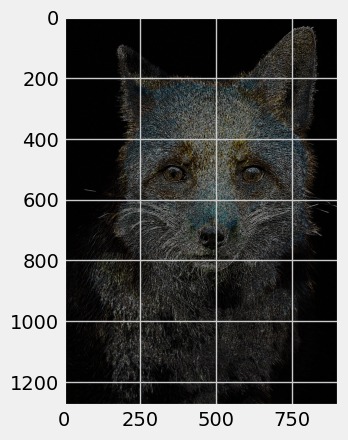

In [11]:
# Apply FIND_EDGES filter to the image
image_edges = img.filter(filter=ImageFilter.FIND_EDGES)
plt.imshow(image_edges)
plt.show()

#### This filter detects significant changes in pixel intensity to highlight edges and transitions within the image. It emphasizes the outlines of the fox's face and key regions, leaving the rest of the image dark. While it effectively isolates edges for detection tasks, the output may seem dim due to the lack of pixel intensity normalization.

## Q2

In [14]:
# Importing all necessary libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

In [15]:
img = Image.open("animal_data/train/cats/cat001.jpg")

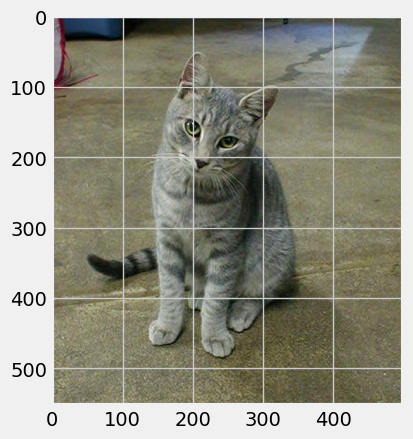

In [16]:
plt.imshow(img)
plt.show()

In [17]:
img.mode

'RGB'

In [18]:
M = np.asarray(img)
M.shape

(553, 500, 3)

In [19]:
img_width, img_height = 553, 500

In [20]:
train_data_dir = 'animal_data/train'
test_data_dir = 'animal_data/test'
nb_train_samples = 50
nb_test_samples = 15
epochs = 25
batch_size = 5

In [21]:
K.image_data_format()

'channels_last'

In [22]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [23]:
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Flatten())
model.add(Dense(64)) #fully connected deep learning network
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1)) #output layer
model.add(Activation('sigmoid'))

In [24]:
import keras
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [25]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255, 
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
 
test_datagen = ImageDataGenerator(rescale=1. / 255)
 
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
 
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
 
model.fit(
    train_generator,
    steps_per_epoch=int(nb_train_samples / batch_size),
    epochs=epochs,
    validation_data=test_generator,
    validation_steps= int(nb_test_samples / batch_size))

Found 100 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
Epoch 1/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 0.4403 - loss: 1.4689 - val_accuracy: 0.4667 - val_loss: 0.6820
Epoch 2/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.6133 - loss: 0.6063 - val_accuracy: 0.4667 - val_loss: 0.6973
Epoch 3/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 4/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.5483 - loss: 0.6609 - val_accuracy: 0.6000 - val_loss: 0.6774
Epoch 5/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.5879 - loss: 0.7863 - val_accuracy: 0.2667 - val_loss: 0.7033
Epoch 6/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.6490 - loss: 0.5666 - val_accuracy: 0.6000 - val_loss: 0.8027
Epoch 8/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.6098 - loss: 0.7704 - val_accuracy: 0.400

#### Best Training Accuracy: 80.95% at Epoch 16
#### Best Testing Accuracy: 60% at Epoch 4, 7 and 14

In [70]:
model.save('cat_dog_model.keras')

### Loading the model and make Prediction on new data

In [72]:
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import numpy as np
 
from keras.models import load_model
 
model = load_model('cat_dog_model.keras')

In [74]:
image = load_img('animal_data/new/cats/cat066.jpg', target_size=(553, 500))

img = np.array(image)
img = img / 255.0
img = img.reshape(1,553, 500,3)
label = model.predict(img)

if (label[0][0] < 0.5):
    out = "0 - Cat"
else:
    out = "1 - Dog"

print("Class (0-Cats , 1-Dogs) and prediction is: ", out)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
Class (0-Cats , 1-Dogs) and prediction is:  1 - Dog


In [76]:
image = load_img('animal_data/new/cats/cat067.jpg', target_size=(553, 500))

img = np.array(image)
img = img / 255.0
img = img.reshape(1,553, 500,3)
label = model.predict(img)

if (label[0][0] < 0.5):
    out = "0 - Cat"
else:
    out = "1 - Dog"

print("Class (0-Cats , 1-Dogs) and prediction is: ", out)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Class (0-Cats , 1-Dogs) and prediction is:  1 - Dog


In [78]:
image = load_img('animal_data/new/cats/cat068.jpg', target_size=(553, 500))

img = np.array(image)
img = img / 255.0
img = img.reshape(1,553, 500,3)
label = model.predict(img)

if (label[0][0] < 0.5):
    out = "0 - Cat"
else:
    out = "1 - Dog"

print("Class (0-Cats , 1-Dogs) and prediction is: ", out)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Class (0-Cats , 1-Dogs) and prediction is:  0 - Cat


In [80]:
image = load_img('animal_data/new/dogs/dog066.jpg', target_size=(553, 500))

img = np.array(image)
img = img / 255.0
img = img.reshape(1,553, 500,3)
label = model.predict(img)

if (label[0][0] < 0.5):
    out = "0 - Cat"
else:
    out = "1 - Dog"

print("Class (0-Cats , 1-Dogs) and prediction is: ", out)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Class (0-Cats , 1-Dogs) and prediction is:  0 - Cat


In [82]:
image = load_img('animal_data/new/dogs/dog067.jpg', target_size=(553, 500))

img = np.array(image)
img = img / 255.0
img = img.reshape(1,553, 500,3)
label = model.predict(img)

if (label[0][0] < 0.5):
    out = "0 - Cat"
else:
    out = "1 - Dog"

print("Class (0-Cats , 1-Dogs) and prediction is: ", out)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Class (0-Cats , 1-Dogs) and prediction is:  0 - Cat


In [35]:
image = load_img('animal_data/new/dogs/dog068.jpg', target_size=(553, 500))

img = np.array(image)
img = img / 255.0
img = img.reshape(1,553, 500,3)
label = model.predict(img)

if (label[0][0] < 0.5):
    out = "0 - Cat"
else:
    out = "1 - Dog"

print("Class (0-Cats , 1-Dogs) and prediction is: ", out)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Class (0-Cats , 1-Dogs) and prediction is:  0 - Cat


#### The model was able to accurately predict only one out of the six new images, indicating that it requires further improvement. The limited training dataset of 50 images is likely insufficient for the model to generalize effectively. Additionally, the highest testing accuracy achieved was only 60%, which is relatively low. This means the model isn’t working well yet and needs more training with a bigger dataset and some adjustments.